In [1]:
import pandas as pd
import numpy as np
from glob import glob

## 修改文件后缀名错误

In [17]:
record_paths = glob("/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/439/Raw/20210113/Records-0/*.csv")
reference_paths = glob("/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/439/Raw/20210113/References-0/*.jpg")

In [18]:
# 文件名命名修正
import shutil
for rp_src in record_paths:
    if ".csv.csv" in rp_src:
        rp_dest = rp_src.replace(".csv.csv", ".csv")
    elif ".jpg.csv" in rp_src:
        rp_dest = rp_src.replace(".jpg.csv", ".csv")
    else:
        rp_dest = rp_src
    rp_dest = rp_dest.replace("Records-0", "Records")
    shutil.copy(rp_src, rp_dest)

In [19]:
for rp_src in reference_paths:
    if ".jpg.jpg" in rp_src:
        rp_dest = rp_src.replace(".jpg.jpg", ".jpg")
    elif "jpg.jpg" in rp_src:
        rp_dest = rp_src.replace("jpg.jpg", ".jpg")
    else:
        rp_dest = rp_src
    rp_dest = rp_dest.replace("References-0", "References")
    shutil.copy(rp_src, rp_dest)

## 移动文件到Results/Records和Results/References

In [24]:
record_paths = glob("/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/439/Raw/**/Records/*.csv")
reference_paths = glob("/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/439/Raw/**/References/*.jpg")

In [27]:
dir_dst = "/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/439/Results/Records"
for rp_src in record_paths:
    rn = rp_src.split("/")[-1]
    rp_dst = os.path.join(dir_dst, rn)
    shutil.copy(rp_src, rp_dst)

In [28]:
dir_dst = "/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/439/Results/References"
for rp_src in reference_paths:
    rn = rp_src.split("/")[-1]
    rp_dst = os.path.join(dir_dst, rn)
    shutil.copy(rp_src, rp_dst)

In [23]:
rp_src

'/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/439/Raw/20201230/Records/napkin_20201230_008.csv'

In [12]:
data_descriptions = pd.read_csv("/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/450/Raw/20201226/manual_info.csv")

In [13]:
record_dir = "/Users/liuziyi/Documents/Lifesensse/Data/NonwearCheck/450/Raw/20201226/Records-1"

In [16]:
for index, series in data_descriptions.iterrows():
    try:
        filename = series["file_name"]
        filepath = os.path.join(record_dir, filename)
        record = pd.read_csv(filepath, header=None, error_bad_lines=False, engine="python", skipfooter=1)
        if series["light"] == "green":
            record = record.loc[record[0] != 4]
            record.loc[record[0] == 1, 0] = 161
        else:
            record = record[record[0] != 1]
            record.loc[record[0] == 4, 0] = 164
        filepath = filepath.replace("Records-1", "Records")
        record.to_csv(filepath, header=None, index=False)
    except:
        print("no: ",  series)

In [6]:
record_paths_src = glob("/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/450/Raw/*/Records/*.csv")
record_dir_dst = "/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/450/Results/Records"

In [8]:
import shutil
for rp_src in record_paths:
    rp_dst = os.path.join(record_dir_dst, rp_src.split("/")[-1])
    shutil.copy(rp_src, rp_dst)

In [11]:
reference_paths_src = glob("/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/450/Raw/*/References/*.jpg")
reference_dir_dst = "/Users/liuziyi/Documents/Lifesense/Data/NonwearCheck/450/Results/References"

In [12]:
for rp_src in reference_paths_src:
    rp_dst = os.path.join(reference_dir_dst, rp_src.split("/")[-1])
    shutil.copy(rp_src, rp_dst)

In [54]:
record = pd.read_csv("/Users/liuziyi/Documents/Lifesense/Programming/450项目佩戴检测数据采集表_20201130-2/rawdata/20201130133.csv.csv", header=None, error_bad_lines=False, engine="python")

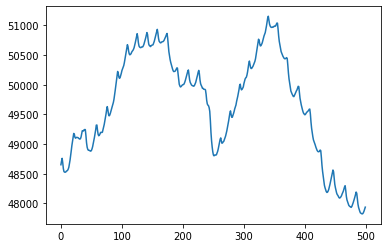

In [55]:
import matplotlib.pyplot as plt
ppg = record.loc[record[0] == 1, 1].values[1500:2000].astype(np.uint16)
plt.plot(ppg)

In [31]:
record

,0,1,2,3,4,5,6,7,8,9,10
0,100,0,62,50.0,0.0,250.0,50.0,0.0,250.0,50.0,0.0
1,112,50,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,3200597,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3200569,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3200541,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55262,2,4,-72,-496.0,365920.0,NaN,NaN,NaN,NaN,NaN,NaN
55263,2,4,-72,-496.0,365940.0,NaN,NaN,NaN,NaN,NaN,NaN
55264,2,4,-72,-496.0,365960.0,NaN,NaN,NaN,NaN,NaN,NaN
55265,2,4,-72,-496.0,365980.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
type(np.min([1, 2]))

numpy.int64

In [15]:
record.columns

Int64Index([0, 1, 2], dtype='int64')

In [5]:
for i in range(32):
    print("green")
    print("ir")
    print("green")
    print("ir")
    print("green")
    print("ir")

green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir
green
ir


In [4]:
192/ 6

32.0